# I. Load Dataset

In [89]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [90]:
df_origin = pd.read_csv('./IMDB-Dataset.csv')
df_origin = df_origin.drop_duplicates()

df = df_origin.copy()
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [92]:
df.sentiment.unique()

array(['positive', 'negative'], dtype=object)

In [93]:
df.isna().sum(axis=0)

review       0
sentiment    0
dtype: int64

In [94]:
df.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


# II. Preprocessing

In [95]:
from collections import Counter
import contractions
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chaum\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [96]:
stop_words = set(stopwords.words('english'))


def expand_contractions(text):
    return contractions.fix(text)


def preprocess_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove html tags
    # Expand chatreview length and contracts clearing contractions
    text = expand_contractions(text)
    emoji_clean = re.compile("["
                             u"\U0001F600-\U0001F64F"  # emoticons
                             u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                             u"\U0001F680-\U0001F6FF"  # transport & map symbols
                             u"\U0001F1E0-\U0001F1FF"  # flags
                             u"\U00002702-\U000027B0"  # mix of symbols
                             u"\U000024C2-\U0001F251"  # miscellaneous symbols and characters
                             "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'', text)
    text = re.sub(r'\.(?=\S)', '. ', text)  # add space after full stop_words
    text = re.sub(r'http\S+', '', text)  # remove urls
    text = "".join([
        word.lower() for word in text if word not in string.punctuation
    ])  # remove punctuation and make text lowercase
    lemmatizer = WordNetLemmatizer()
    text = " ".join([
        lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words and word.isalpha()
    ])  # remove numbers, stop review length and lemmatize
    return text

In [97]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [98]:
preprocess_text(df['review'][0])

'one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show would dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watc

In [99]:
df['review'] = df['review'].apply(preprocess_text)

# III. EDA

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

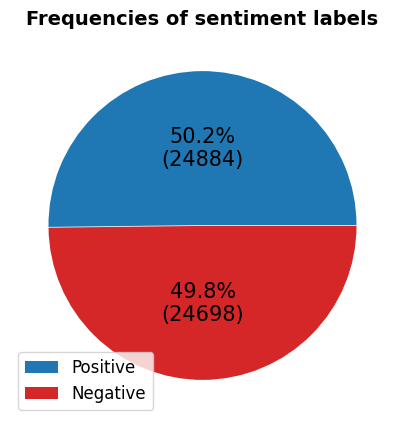

In [101]:
def func(pct, data):
    absolute = int((pct / 100.)*np.sum(data))
    return f"{pct:.1f}%\n({absolute:d})"


freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]
labels = ['positive', 'negative']

pie, _ = plt.subplots(figsize=[5, 5])
plt.pie(x=data, autopct=lambda pct: func(pct, data), explode=[
        0.0025]*2, pctdistance=0.5, colors=[sns.color_palette()[0], 'tab:red'], textprops={'fontsize': 15})
plt.title('Frequencies of sentiment labels', fontsize=14, fontweight='bold')
plt.legend([label.capitalize()
           for label in labels], loc="best", prop={'size': 12})
pie.savefig("PieChart.png")
plt.show()

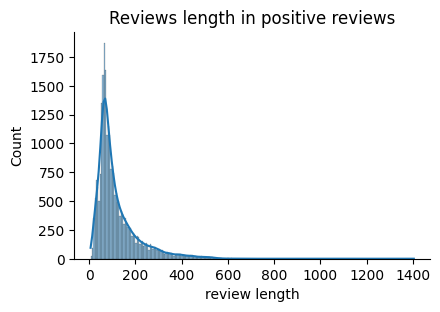

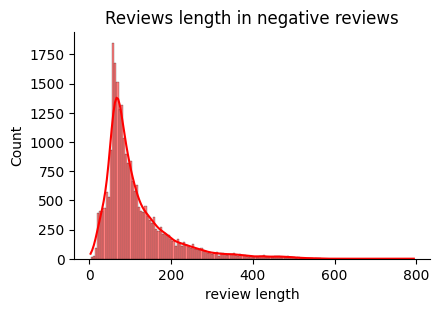

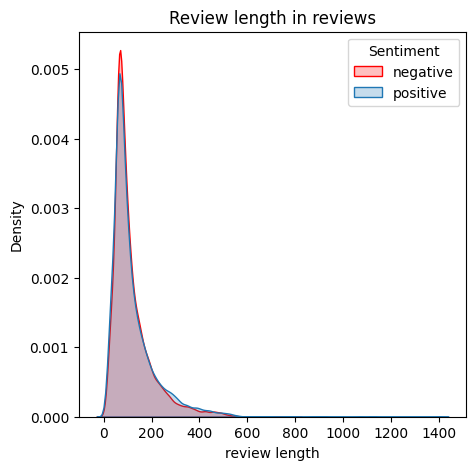

In [102]:
review_len = df['review'].str.split().apply(lambda x: len(x))
df_temp = df.copy()
df_temp['review length'] = review_len

sns.displot(
    data=df_temp[df_temp['sentiment'] == 'positive'],
    x="review length", hue="sentiment", kde=True,  height=3, aspect=1.5, legend=False
).set(title='Reviews length in positive reviews')

sns.displot(
    data=df_temp[df_temp['sentiment'] == 'negative'],
    x="review length", hue="sentiment", kde=True,  height=3, aspect=1.5, legend=False,  palette=['red']
).set(title='Reviews length in negative reviews')

plt.figure(figsize=(5, 5))
sns.kdeplot(
    data=df_temp, x="review length", hue="sentiment", fill=True,  palette=[sns.color_palette()[0], 'red']
).set(title='Review length in reviews')
plt.legend(title='Sentiment', labels=['negative', 'positive'])
plt.show()

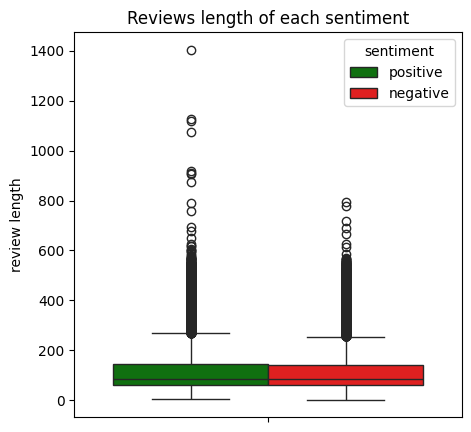

In [103]:
fig, ax = plt.subplots(figsize=(5, 5))
box_plot = sns.boxplot(
    data=df_temp, hue="sentiment", y='review length', palette=['green', 'red'], legend=True
).set(title='Reviews length of each sentiment')
plt.show(box_plot)

In [104]:
words = ' '.join(df['review']).split()
counter = Counter(words)
most = counter.most_common()
vocabs, word_counts = [], []
for word, count in most:
    vocabs.append(word)
    word_counts.append(count)

In [105]:
most[:10]

[('movie', 100605),
 ('film', 91130),
 ('one', 53525),
 ('like', 39746),
 ('would', 30811),
 ('time', 30091),
 ('good', 28905),
 ('character', 27801),
 ('story', 24600),
 ('even', 24440)]

Text(0.5, 1.0, 'Most Common Word In Job Description')

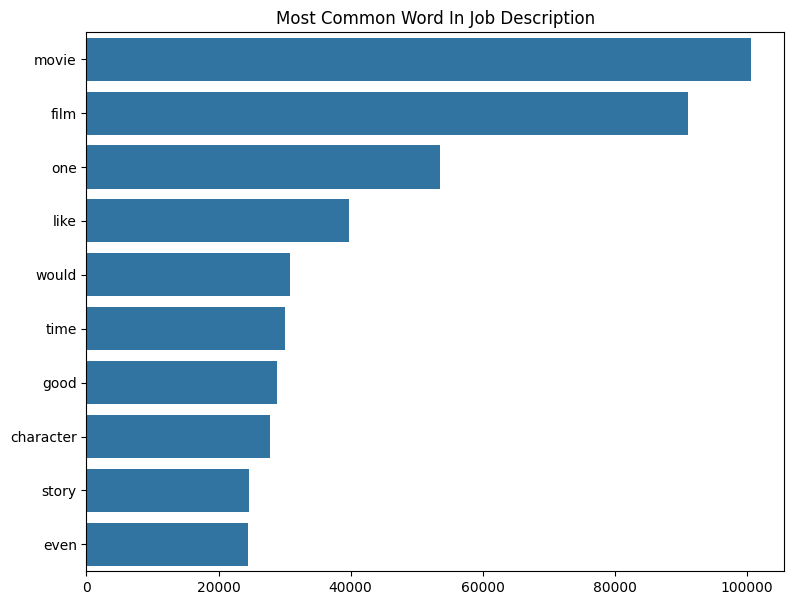

In [106]:
plt.figure(figsize=(9, 7))
sns.barplot(x=word_counts[:10], y=vocabs[:10])
plt.title("Most Common Word In Job Description")

In [107]:
word_count_df = pd.DataFrame({
    'word': vocabs,
    'word_count': word_counts
})

In [108]:
word_count_df

,word,word_count
0,movie,100605
1,film,91130
2,one,53525
3,like,39746
4,would,30811
...,...,...
143175,ohsohard,1
143176,effortful,1
143177,frenchonly,1
143178,clatter,1


# IV. Encoding

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [110]:
x_data = df['review']
x_data[:5]

0    one reviewer mentioned watching oz episode hoo...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake think zombie ...
4    petter matteis love time money visually stunni...
Name: review, dtype: object

In [111]:
label_encode = LabelEncoder()
y_data = label_encode.fit_transform(df['sentiment'])
y_data[:5]

array([1, 1, 1, 0, 1])

In [112]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42
)

In [113]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(x_train, y_train)

TfidfVectorizer(max_features=10000)

In [114]:
x_train_encoded = tfidf_vectorizer.fit_transform(x_train)
x_test_encoded = tfidf_vectorizer.transform(x_test)

In [115]:
x_train_encoded.shape

(39665, 10000)

# V. Train and Test Model

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [117]:
rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(x_train_encoded, y_train)
y_pred = rf_classifier.predict(x_test_encoded)

accuracy_score(y_pred, y_test)

0.8420893415347384

# VI. Example

In [130]:
my_review = ["""
The film is a visual and emotional rollercoaster, seamlessly blending action, comedy, and heartfelt moments. 
Michelle Yeoh delivers a powerhouse performance, showcasing her incredible range and physicality. 
The supporting cast, including Stephanie Hsu and Ke Huy Quan, 
also shine in their respective roles, adding depth and humor to the story.
"""]

In [131]:
example_encoded = tfidf_vectorizer.transform(my_review)
example_pred = rf_classifier.predict(example_encoded)
print(f"Sentiments: {label_encode.classes_}")
print(f"Sentiment of review is {label_encode.inverse_transform(example_pred)}")

Sentiments: ['negative' 'positive']
Sentiment of review is ['positive']
